# Ejercicio 1: Preparar el ambiente de trabajo

In [14]:
#import warnings
#warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import glob
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [15]:
# Ruta absoluta del directorio actual
ruta_absoluta = os.getcwd()

# Lista de todos los archivos CSV en el directorio
lista_archivos_csv = glob.glob(os.path.join(ruta_absoluta, "dump", "*.csv"))

# Lista de dataFrames, uno por cada archivo csv
lista_dataframes = [pd.read_csv(archivo_csv) for archivo_csv in lista_archivos_csv]

# Concatenación de dataframes
df = pd.concat(lista_dataframes, ignore_index=True).drop('Unnamed: 0', axis=1)

# Renombrar columnas
df.columns = ['Artist', 'Genre', 'Song', 'Lyrics']

In [16]:
df.head()

,Artist,Genre,Song,Lyrics
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


In [17]:
df.columns

Index(['Artist', 'Genre', 'Song', 'Lyrics'], dtype='object')

In [18]:
df.shape

(9489, 4)

# Ejercicio 2: Descripción de los datos

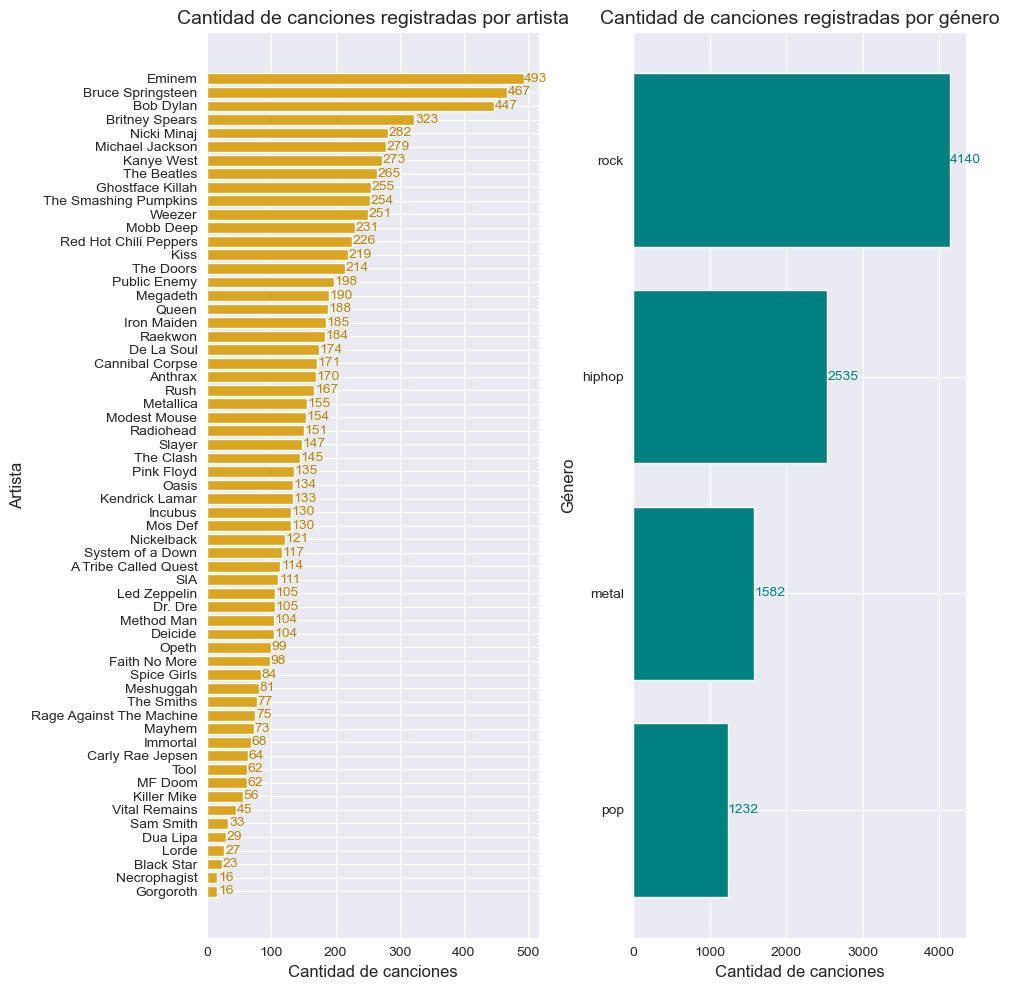

In [19]:
songs_by_artist = df["Artist"].value_counts().sort_values(ascending=True)
songs_by_genre = df["Genre"].value_counts().sort_values(ascending=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10))

ax1.barh(songs_by_artist.index, songs_by_artist.values, color='goldenrod')
ax1.set_xlabel("Cantidad de canciones", fontsize=12)
ax1.set_ylabel("Artista", fontsize=12)
ax1.set_title("Cantidad de canciones registradas por artista", fontsize=14)

for i, v in enumerate(songs_by_artist.values):
    ax1.text(v + 1, i, str(v), color='darkgoldenrod', size='medium', va='center')


ax2.barh(songs_by_genre.index, songs_by_genre.values, color='teal')
ax2.set_ylabel("Género", fontsize=12)
ax2.set_xlabel("Cantidad de canciones", fontsize=12)
ax2.set_title("Cantidad de canciones registradas por género", fontsize=14)

for i, v in enumerate(songs_by_genre.values):
    ax2.text(v + 1, i, str(v), color='teal', size='medium', va='center')

fig.tight_layout()
plt.show()

    La mayor cantidad de canciones registradas las tiene el género 'rock' con 4140 ejemplares. A su vez, los artistas de este género que sobresalen en cantidad de canciones son Bob Springsteen y Bob Dylan con 467 y 447 canciones respectivamente.
    El segundo género que destaca es 'hiphop' cuyo artista más destacado en cantidad de canciones es Eminem con 493.

# Ejercicio 3: Matriz de ocurrencias

    El objetivo de la clase CountVectorizer de Scikit-learn en Python es convertir un conjunto de documentos de texto en una matriz de recuento de términos/token para su uso en tareas de análisis de texto como la clasificación de documentos, la agrupación de documentos o la extracción de temas.

In [20]:
#from sklearn.feature_extraction.text import CountVectorizer

# instanciamos un objeto
count_vectorizer = CountVectorizer(stop_words='english')
# Implementamos los pasos fit y transform
count_vectorizer_fit_transform = count_vectorizer.fit_transform(df.Lyrics)
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names_out() # ordena en orden alfabético las palabras únicas
# extraemos frecuencia
words_freq = count_vectorizer_fit_transform.toarray().sum(axis=0)
# palabras a dataframe
words_freq_df = pd.DataFrame([list(words), list(words_freq)]).T

In [21]:
count_vectorizer_fit_transform

<9489x49019 sparse matrix of type '<class 'numpy.int64'>'
	with 861408 stored elements in Compressed Sparse Row format>

In [22]:
words_freq

array([14, 42,  2, ...,  2,  1,  1], dtype=int64)

In [23]:
words_freq_df.columns = ['words', 'freq']
words_freq_df_100 = words_freq_df.sort_values(by='freq', ascending=False)[:100] # 100 palabras más repetidas
words_freq_df_100

,words,freq
24950,like,19629
12859,don,17398
23856,know,14962
18439,got,14171
23287,just,13978
...,...,...
11041,death,1897
24615,left,1895
43442,thing,1882
14305,end,1829


    100 palabras más repetidas en la base de datos

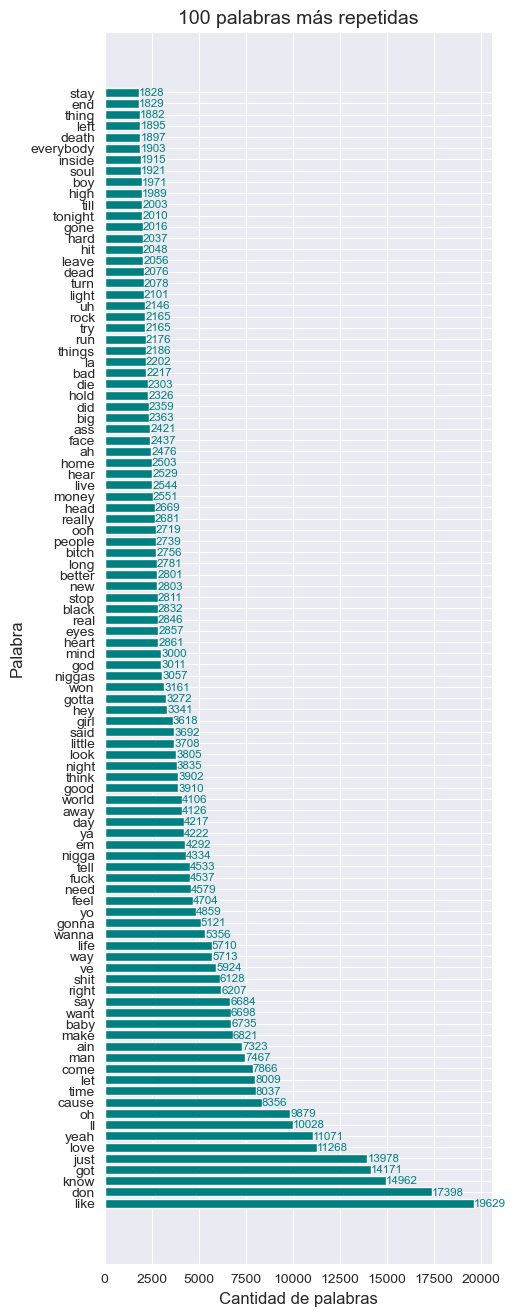

In [24]:
plt.figure(figsize=(5,16))
plt.barh(words_freq_df_100.words, words_freq_df_100.freq, color='teal')
plt.title('100 palabras más repetidas', fontsize=14)
plt.xlabel('Cantidad de palabras', fontsize=12)
plt.ylabel('Palabra', fontsize=12)
for i, v in enumerate(words_freq_df_100.freq.values):
    plt.text(v + 1, i, str(v), color='teal',size='small', va='center')

In [25]:
def word_count_by_genre(vectorizer=CountVectorizer(stop_words='english', ngram_range=(1,2)), df=df, target='Lyrics', genre='hiphop', sort_n=50):
    
    count_vectorizer = vectorizer
    count_vectorizer_fit_transform = count_vectorizer.fit_transform(df[df['Genre'] == genre][target])
    words = count_vectorizer.get_feature_names_out()
    words_freq = count_vectorizer_fit_transform.toarray().sum(axis=0)
    words_freq_df = pd.DataFrame([list(words), list(words_freq)]).T
    words_freq_df.columns = ['words', 'freq']
    words_freq_df_100 = words_freq_df.sort_values(by='freq', ascending=False)[:sort_n]
    #plt.figure(figsize=(5,16))
    plt.barh(words_freq_df_100.words, words_freq_df_100.freq, color='teal',)
    plt.xlabel('Cantidad de palabras', fontsize=12)
    plt.title(genre, fontsize=14)
    for i, v in enumerate(words_freq_df_100.freq.values):
        plt.text(v + 1, i, str(v), color='teal',size='small', va='center')

    Palabras más repetidas por género

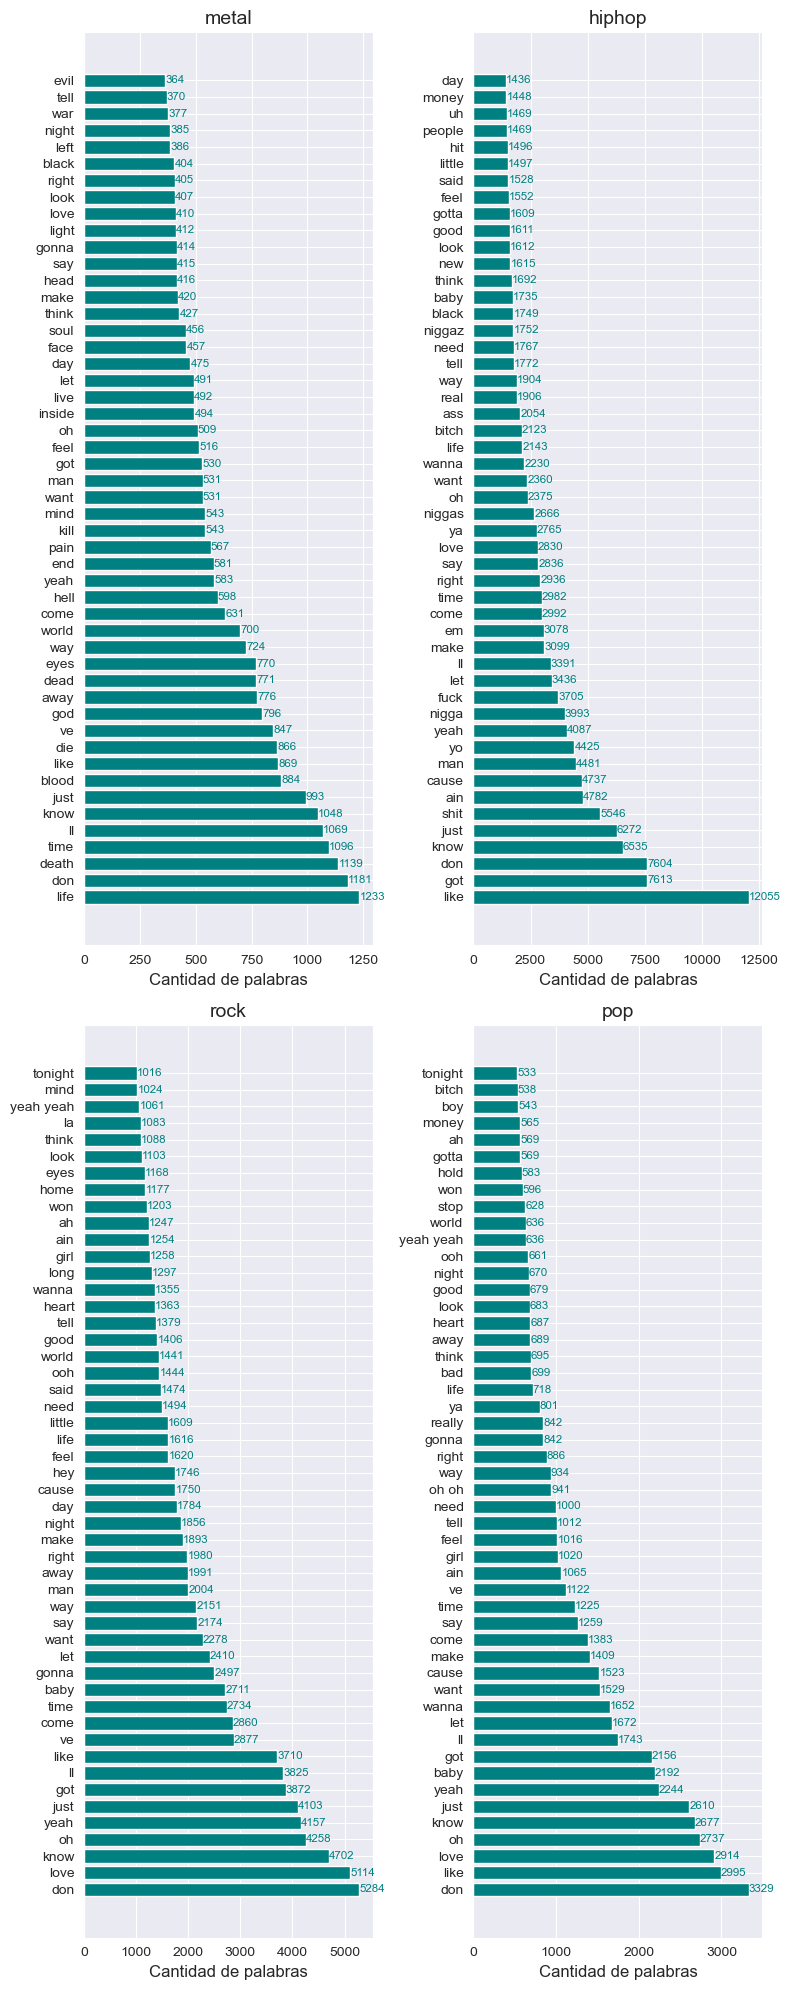

In [26]:
plt.figure(figsize=(8, 20))
for index, gen in enumerate(df.Genre.unique()):
    plt.subplot(2, 2, index + 1)
    word_count_by_genre(genre=gen, sort_n=50)
    plt.tight_layout()

    Como se puede observar, existen palabras más comunes para ciertos géneros musicales, por ejemplo, para los géneros 'rock' y 'pop', la palabra 'love' se ubica en el top 2 y top 3 respectivamente. Otro ejemplo, la palabra 'life' es la más repetida solo en el género 'metal'.
    En el caso del género hiphop se observa una gran cantidad de palabras vulgares.

# Ejercicio 4: Entrenamiento del Modelo

### Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.

In [27]:
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Lyrics'],
                                                    df['Genre'],
                                                    test_size=.4,
                                                    random_state=94)

### Monte el modelo dentro de un Pipeline, donde el primer paso es implementar CountVectorizer y el segundo es ejecutar el clasificador MultinomialNB.

In [28]:
# from sklearn.pipeline import Pipeline

text_clasiff = Pipeline([('vect', CountVectorizer(stop_words='english')), ('classif', MultinomialNB(alpha=0.1))])
text_clasiff

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('classif', MultinomialNB(alpha=0.1))])

In [29]:
# entrenar modelo
text_clasiff.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('classif', MultinomialNB(alpha=0.1))])

### A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones correspondientes?

In [30]:
# Lista de letras para predecir
letras = ['I got a place in the underworld', # Brody Dalle - Underworld
          'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
          "Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
          'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris - Move B*tch
          "Sexual violence doesn't start and end with rape It starts in our books and behind our school gates", # IDLES - Mother
          "Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" #Banks - Drowning
          ]

# Realizar predicciones en el conjunto de prueba
y_pred = text_clasiff.predict(letras)
y_pred

array(['rock', 'metal', 'rock', 'pop', 'metal', 'rock'], dtype='<U6')

### Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas.

In [31]:
# predicciones en el conjunto de prueba
yhat = text_clasiff.predict(X_test)
yhat

array(['hiphop', 'hiphop', 'hiphop', ..., 'pop', 'rock', 'pop'],
      dtype='<U6')

In [32]:
# matriz de confusion
# from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, yhat)

array([[ 936,    6,   28,   30],
       [  21,  492,   17,  108],
       [  77,   10,  240,  178],
       [ 110,  117,  115, 1311]], dtype=int64)

In [33]:
# from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

      hiphop       0.82      0.94      0.87      1000
       metal       0.79      0.77      0.78       638
         pop       0.60      0.48      0.53       505
        rock       0.81      0.79      0.80      1653

    accuracy                           0.78      3796
   macro avg       0.75      0.74      0.75      3796
weighted avg       0.78      0.78      0.78      3796



# Ejercicio 5: Mejora del Modelo

### Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peores métricas.

    Debido a que las métricas muestran un bajo desempeño para la clase 'pop', una estrategia para mejorar estos valores podría ser aumentar la cantidad de datos para esta variable, de manera que quede más balanceada y así el modelo pueda mejorar las predicciones al tener mayor información con la que trabajar.

### Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos datos suministrados.

In [34]:
ruta_absoluta_plus_pop = os.getcwd()
lista_archivos_plus_pop_csv = glob.glob(os.path.join(ruta_absoluta_plus_pop, "dump_plus_pop", "*.csv"))
lista_dataframes_plus_pop = [pd.read_csv(archivo_csv) for archivo_csv in lista_archivos_plus_pop_csv]
df_plus_pop = pd.concat(lista_dataframes_plus_pop, ignore_index=True).drop('Unnamed: 0', axis=1)
df_plus_pop.columns = ['Artist', 'Genre', 'Song', 'Lyrics']

In [35]:
X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split(df_plus_pop['Lyrics'],
                                                    df_plus_pop['Genre'],
                                                    test_size=.4,
                                                    random_state=94)

text_clasiff_plus_pop = Pipeline([('vect', CountVectorizer(stop_words='english')), ('classif', MultinomialNB(alpha=0.1))])
text_clasiff_plus_pop

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('classif', MultinomialNB(alpha=0.1))])

In [36]:
# entrenar modelo
text_clasiff_plus_pop.fit(X_train_pop, y_train_pop)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('classif', MultinomialNB(alpha=0.1))])

In [37]:
# predicciones en el conjunto de prueba
yhat_plus_pop = text_clasiff_plus_pop.predict(X_test_pop)
yhat_plus_pop

array(['hiphop', 'rock', 'rock', ..., 'hiphop', 'pop', 'rock'],
      dtype='<U6')

In [38]:
# matriz de confusion
confusion_matrix(y_test_pop, yhat_plus_pop)

array([[ 938,    8,   47,   28],
       [  24,  482,   20,   94],
       [  86,   14,  669,  234],
       [  88,  128,  238, 1224]], dtype=int64)

In [39]:
# classification_report
print(classification_report(y_test_pop, yhat_plus_pop))

              precision    recall  f1-score   support

      hiphop       0.83      0.92      0.87      1021
       metal       0.76      0.78      0.77       620
         pop       0.69      0.67      0.68      1003
        rock       0.77      0.73      0.75      1678

    accuracy                           0.77      4322
   macro avg       0.76      0.77      0.77      4322
weighted avg       0.76      0.77      0.76      4322



### Comente sobre el desempeño general de este.

    Comparando los resultados previos para la clase 'pop', podemos observar que hubo una mejora en ambos indicadores, la precisión y el recall. La precisión pasó de 0.60 a 0.69, lo que indica que el modelo identifica un mayor número de observaciones correctamente como "pop". Por otro lado, el recall pasó de 0.48 a 0.67, lo que indica que el modelo identifica un mayor número casos de la clase 'pop' en general.

    La mejora en la precisión y recall indica que el modelo ahora puede identificar mejor la clase 'pop' después de agregar más datos al modelo. Sin embargo, la precisión de la clase 'pop' todavía es relativamente baja en comparación con las otras clases en el segundo resultado, lo que sugiere que el modelo puede estar clasificando algunas observaciones de 'pop' incorrectamente como otras clases.